In [1]:
from __future__ import division
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/AB_NYC_2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 16
Number of examples: 14884


In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [5]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14879,11801984,"Bright, contemporary and best location.",24232061,Tracy,Manhattan,Upper East Side,40.77189,-73.95540,Private room,122.0,9.0,12.0,2018-10-27,0.32,3.0,160.0
14880,11802086,5 rooms in clean apartment /West Harlem,62852828,Latrisha,Manhattan,Harlem,40.82443,-73.95265,Entire home/apt,400.0,3.0,2.0,2018-05-11,0.06,2.0,88.0
14881,11803487,Home 4 Medical Professionals-Brooklyn Hospital,26377263,Stat,Brooklyn,Fort Greene,40.68906,-73.97763,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0
14882,11803893,Home 4 Medical Professionals-LIU,26377263,Stat,Brooklyn,Fort Greene,40.69006,-73.98056,Private room,54.0,30.0,0.0,NaN,NaN,43.0,361.0
14883,11804245,Home 4 Medical Professionals-Methodist Hospital,26377263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,12428.000000,14883.000000,14883.000000
mean,40.729763,-73.958634,155.733118,7.485252,39.405832,0.877399,3.124504,107.324531
std,0.052082,0.036243,247.072148,25.980234,64.194251,1.209976,10.488179,134.440878
min,40.499790,-74.240840,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689645,-73.983615,75.000000,1.000000,1.000000,0.090000,1.000000,0.000000
50%,40.723370,-73.958900,117.000000,3.000000,10.000000,0.330000,1.000000,11.000000
75%,40.763960,-73.942780,176.000000,5.000000,49.000000,1.202500,2.000000,238.000000
max,40.908040,-73.712990,10000.000000,1250.000000,629.000000,14.580000,121.000000,365.000000


In [7]:
for col in data[['neighbourhood_group', 'neighbourhood', 'room_type']]:
    print('Unique values in column: %s' %col)
    print(data[col].unique()), '\n'

Unique values in column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx' nan]
Unique values in column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Cla

In [8]:
print('Null values in Airbnb dataset: \n')
print(data.isnull().sum())
print('\n')
print('Percentage of null values in review columns: ')
print(round(data['last_review'].isnull().sum()/len(data)*100, 2),"%")


Null values in Airbnb dataset: 

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       2456
reviews_per_month                 2456
calculated_host_listings_count       1
availability_365                     1
dtype: int64


Percentage of null values in review columns: 
16.5 %


<Axes: title={'center': 'Null values in last_review and reviews_per_month'}>

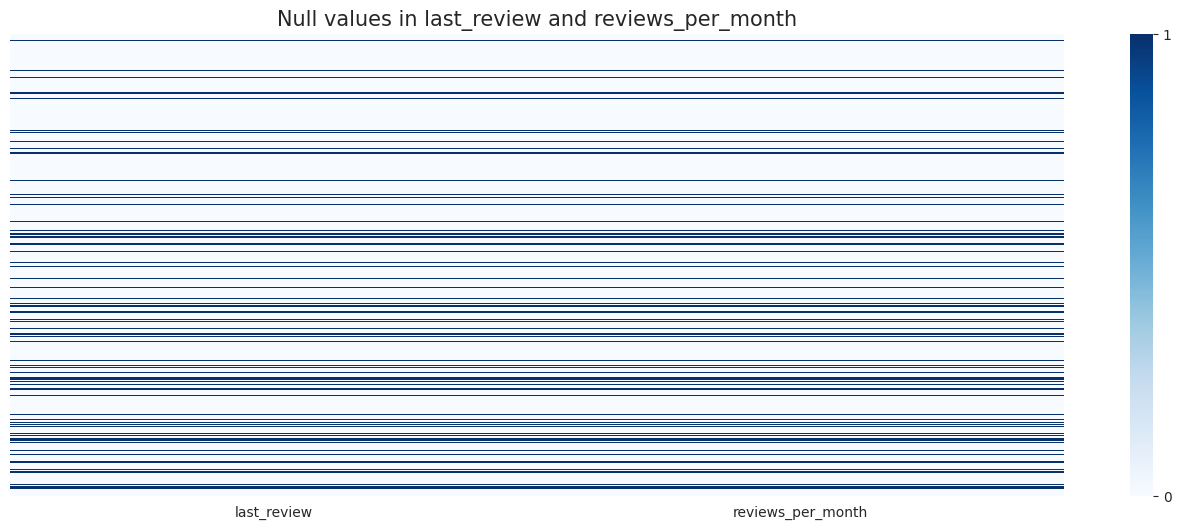

In [9]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(data[['last_review','reviews_per_month' ]].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})

In [10]:
null_name = (pd.DataFrame(np.where((data['name'].isnull())))).transpose()
null_host_name = (pd.DataFrame(np.where((data['host_name'].isnull())))).transpose()

sum_null = pd.concat([null_name,null_host_name], axis=1, ignore_index=True)
sum_null.columns = ['Null rows in name', 'Null rows in host_name']
sum_null


,Null rows in name,Null rows in host_name
0,2854.0,360
1,3703.0,2700
2,5775.0,5745
3,5975.0,6075
4,6269.0,6582
5,6567.0,8163
6,6605.0,8257
7,8841.0,8852
8,11963.0,9138
9,12824.0,9817


In [11]:

data.drop('last_review', axis=1, inplace=True)
# Null values for name and host_name I replace with 0. Also reviews_per_month I replace with 0

data['name'].fillna(value=0, inplace=True)
data['host_name'].fillna(value=0, inplace=True)
data['reviews_per_month'].fillna(value=0, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
dtype: int64

In [12]:
top_3_hosts = (pd.DataFrame(data.host_id.value_counts())).head(3)
top_3_hosts.columns=['Listings']
top_3_hosts['host_id'] = top_3_hosts.index
top_3_hosts.reset_index(drop=True, inplace=True)
top_3_hosts

,Listings,host_id
0,50,7503643
1,44,30283594
2,41,1475015


In [13]:
top_3_neigh = pd.DataFrame(data['neighbourhood_group'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,Neighbourhood Group
0,6990,Manhattan
1,6507,Brooklyn
2,1133,Queens


In [14]:
top_3_neigh = pd.DataFrame(data['neighbourhood_group'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
top_3_neigh

,Listings,Neighbourhood Group
0,6990,Manhattan
1,6507,Brooklyn
2,1133,Queens


In [15]:
# Evaluation 4 - most reviewed hosts

rev_group = pd.DataFrame(data.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Number of reviews'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed

,Host ID,Number of reviews
0,47621202,629.0
1,4734398,607.0
2,4734398,597.0


In [16]:
gr = pd.DataFrame(data.groupby('reviews_per_month').sum()['host_id'])
rev = (gr.sort_values('reviews_per_month',ascending=False)).head(3)
rev.columns = ['Host ID']
rev['Reviews per month'] = rev.index
rev.reset_index(drop=True, inplace=True)
rev

,Host ID,Reviews per month
0,47621202,14.58
1,26432133,13.45
2,47621202,13.40


In [17]:
# Brooklyn
nei1 = data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_nei1 = nei1[['price']]
# Manhattan
nei2 = data.loc[data['neighbourhood_group'] == 'Manhattan']
price_nei2 = nei2[['price']]
# Queens
nei3 = data.loc[data['neighbourhood_group'] == 'Queens']
price_nei3 = nei3[['price']]
# Staten Island
nei4 = data.loc[data['neighbourhood_group'] == 'Staten Island']
price_nei4 = nei4[['price']]
# Bronx
nei5 = data.loc[data['neighbourhood_group'] == 'Bronx']
price_nei5 = nei5[['price']]

price_list = [price_nei1, price_nei2, price_nei3, price_nei4, price_nei5]
price_stats = []
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# price statistics for every neighbourhood

for x in price_list:
    i = x.describe(percentiles=[.25, .5, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index': 'Stats'}, inplace=True)
    price_stats.append(i)

price_stats[0].rename(columns={'price': nei_list[0]}, inplace=True)
price_stats[1].rename(columns={'price': nei_list[1]}, inplace=True)
price_stats[2].rename(columns={'price': nei_list[2]}, inplace=True)
price_stats[3].rename(columns={'price': nei_list[3]}, inplace=True)
price_stats[4].rename(columns={'price': nei_list[4]}, inplace=True)

# final view of dataframe

stats_df = price_stats
stats_df = [df.set_index('Stats') for df in stats_df]
stats_df=stats_df[0].join(stats_df[1:])
stats_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,18.0,10.0,20.0,20.0,25.0
25%,66.0,95.0,57.0,54.0,47.0
50%,100.0,142.0,80.0,75.0,65.0
75%,150.0,200.0,115.0,150.0,96.0
max,8000.0,9999.0,10000.0,1000.0,680.0


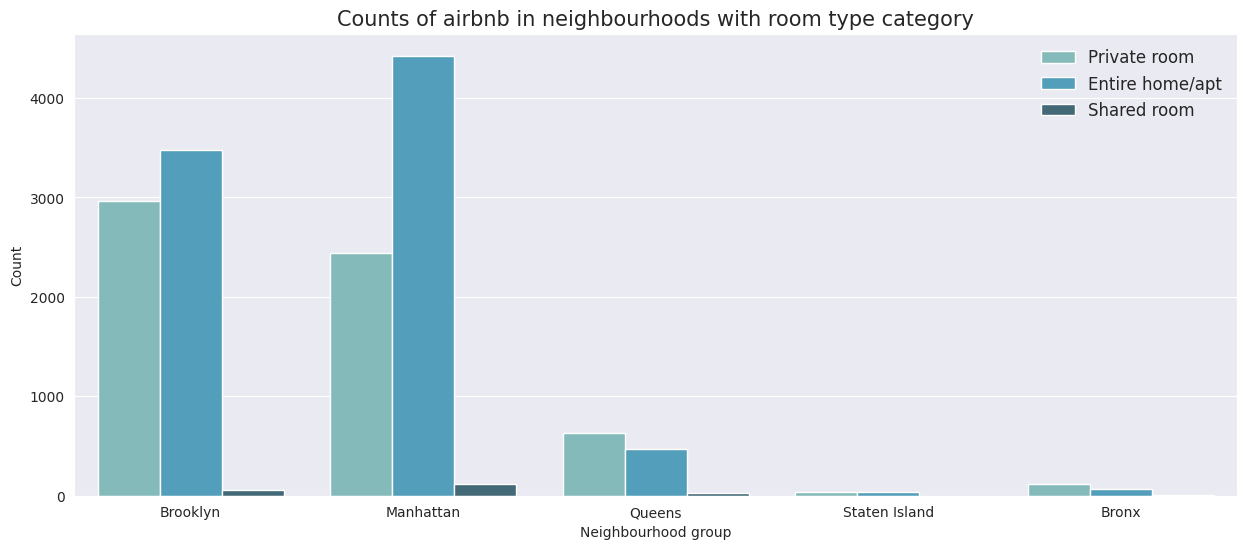

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

Text(0, 0.5, 'Price')

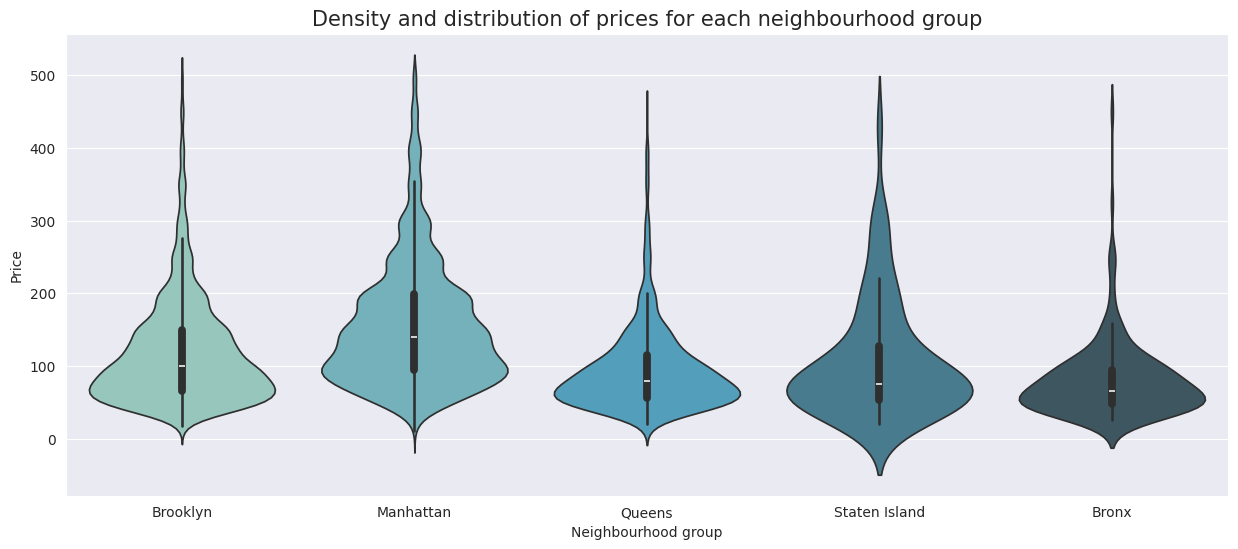

In [19]:
plt.figure(figsize=(15,6))
sns.violinplot(data=data[data.price <500], x='neighbourhood_group', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")

<Figure size 1500x600 with 0 Axes>

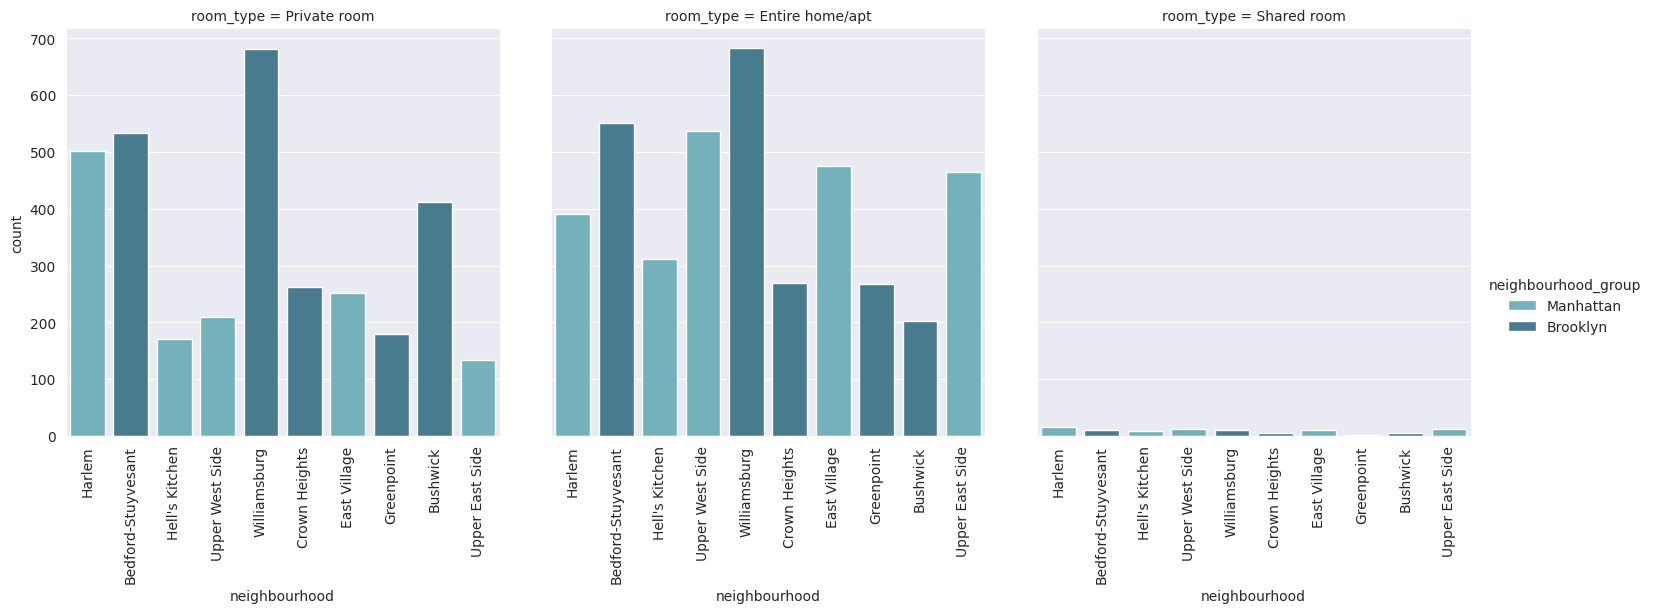

In [20]:
top_nei = data['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index'].tolist()

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=data.loc[data['neighbourhood'].isin(top_nei)], kind='count', palette='GnBu_d')
vis_3.set_xticklabels(rotation=90)

Text(0, 0.5, 'Count')

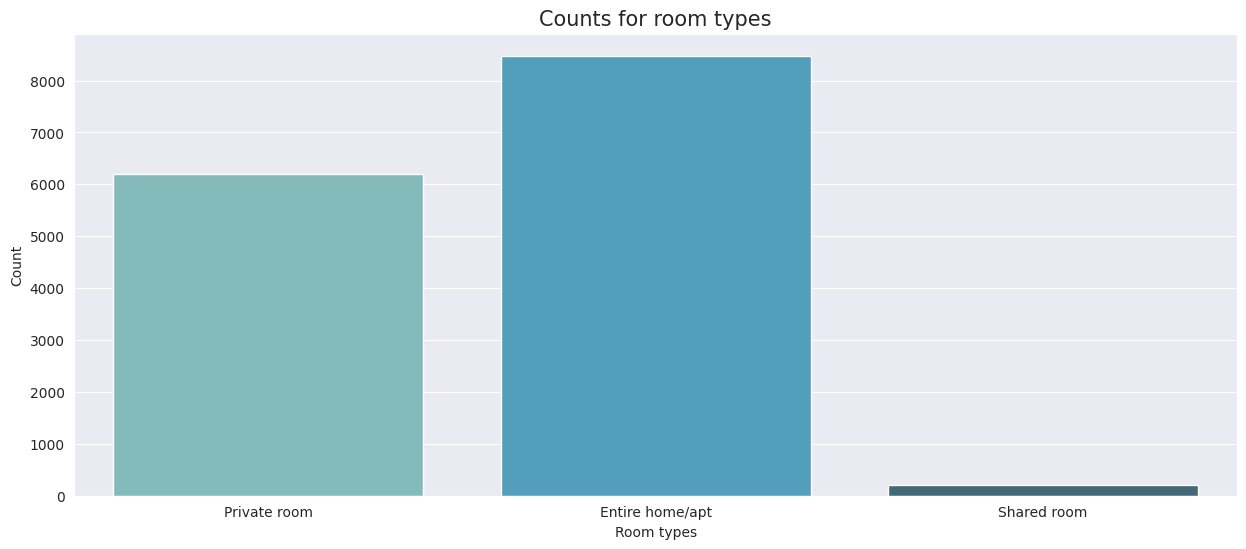

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='room_type', palette='GnBu_d')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

Text(0, 0.5, 'Frequency')

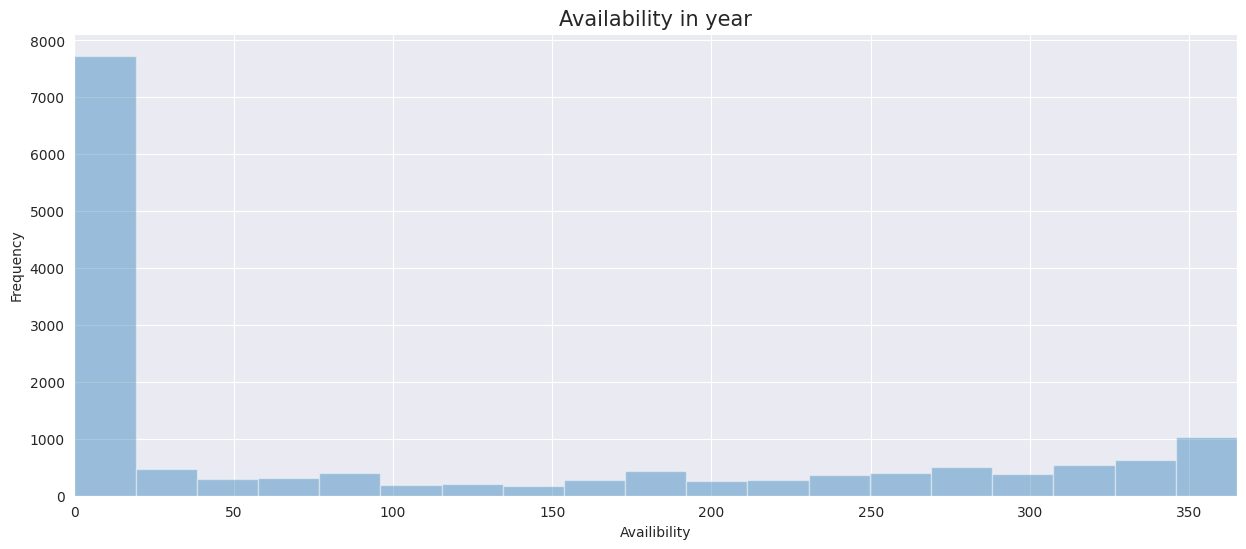

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(data.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")

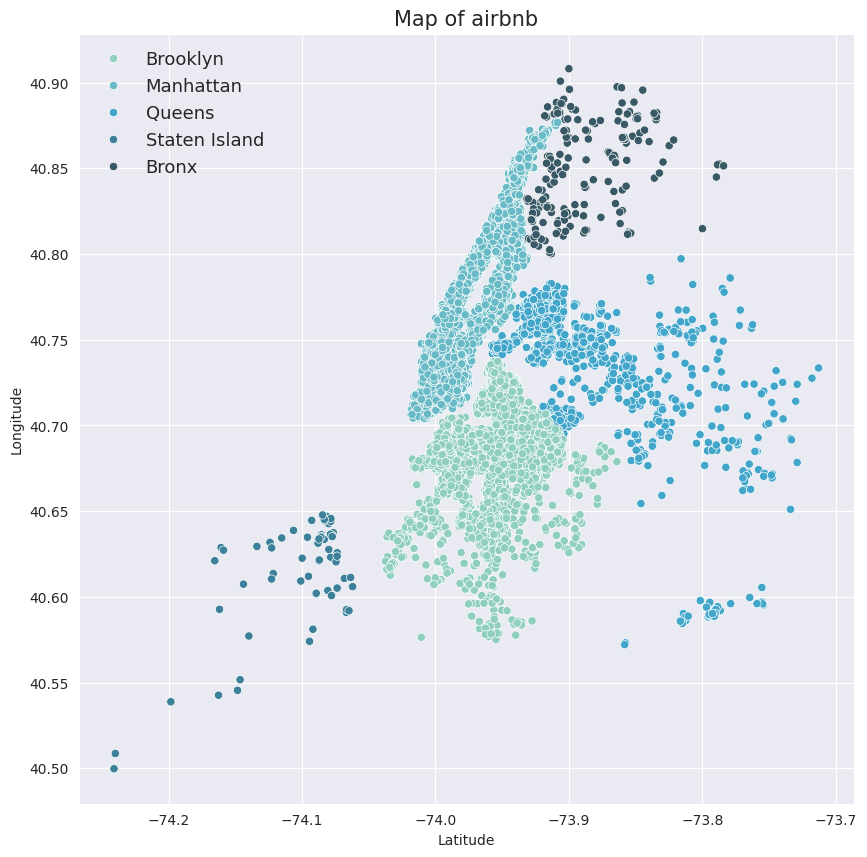

In [23]:
# Visualisation 6 - map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

<Axes: >

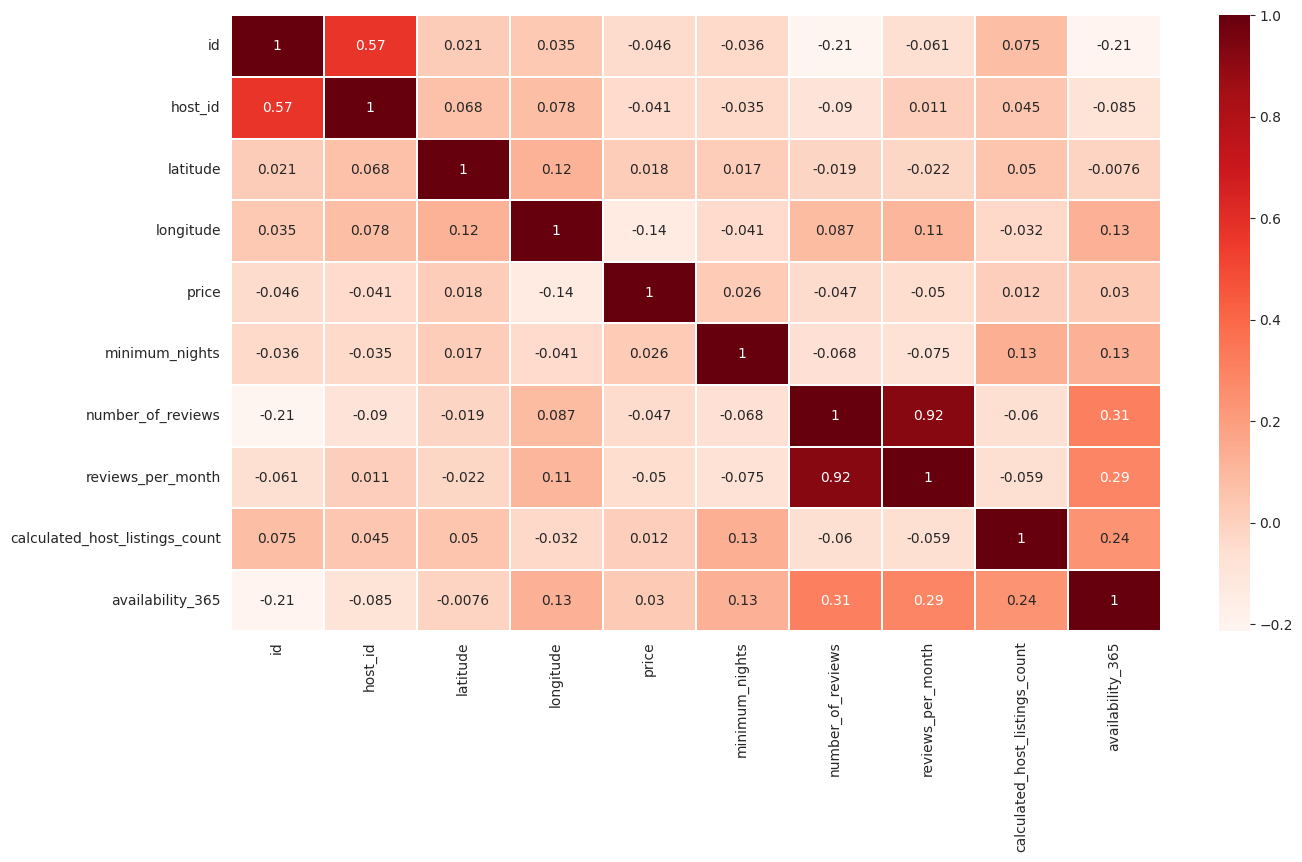

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='Reds')

In [25]:
data1 = pd.DataFrame(data.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean())
data1.reset_index(inplace=True)

bronx = (data1[data1['neighbourhood_group'] =='Bronx']).sort_values(by='price',ascending=False).head(10)
brooklyn = (data1[data1['neighbourhood_group'] =='Brooklyn']).sort_values(by='price',ascending=False).head(10)
manhattan = (data1[data1['neighbourhood_group'] =='Manhattan']).sort_values(by='price',ascending=False).head(10)
queens = (data1[data1['neighbourhood_group'] =='Queens']).sort_values(by='price',ascending=False).head(10)
staten = (data1[data1['neighbourhood_group'] =='Staten Island']).sort_values(by='price',ascending=False).head(10)

neighs = [bronx, brooklyn, manhattan, queens, staten]
titles = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

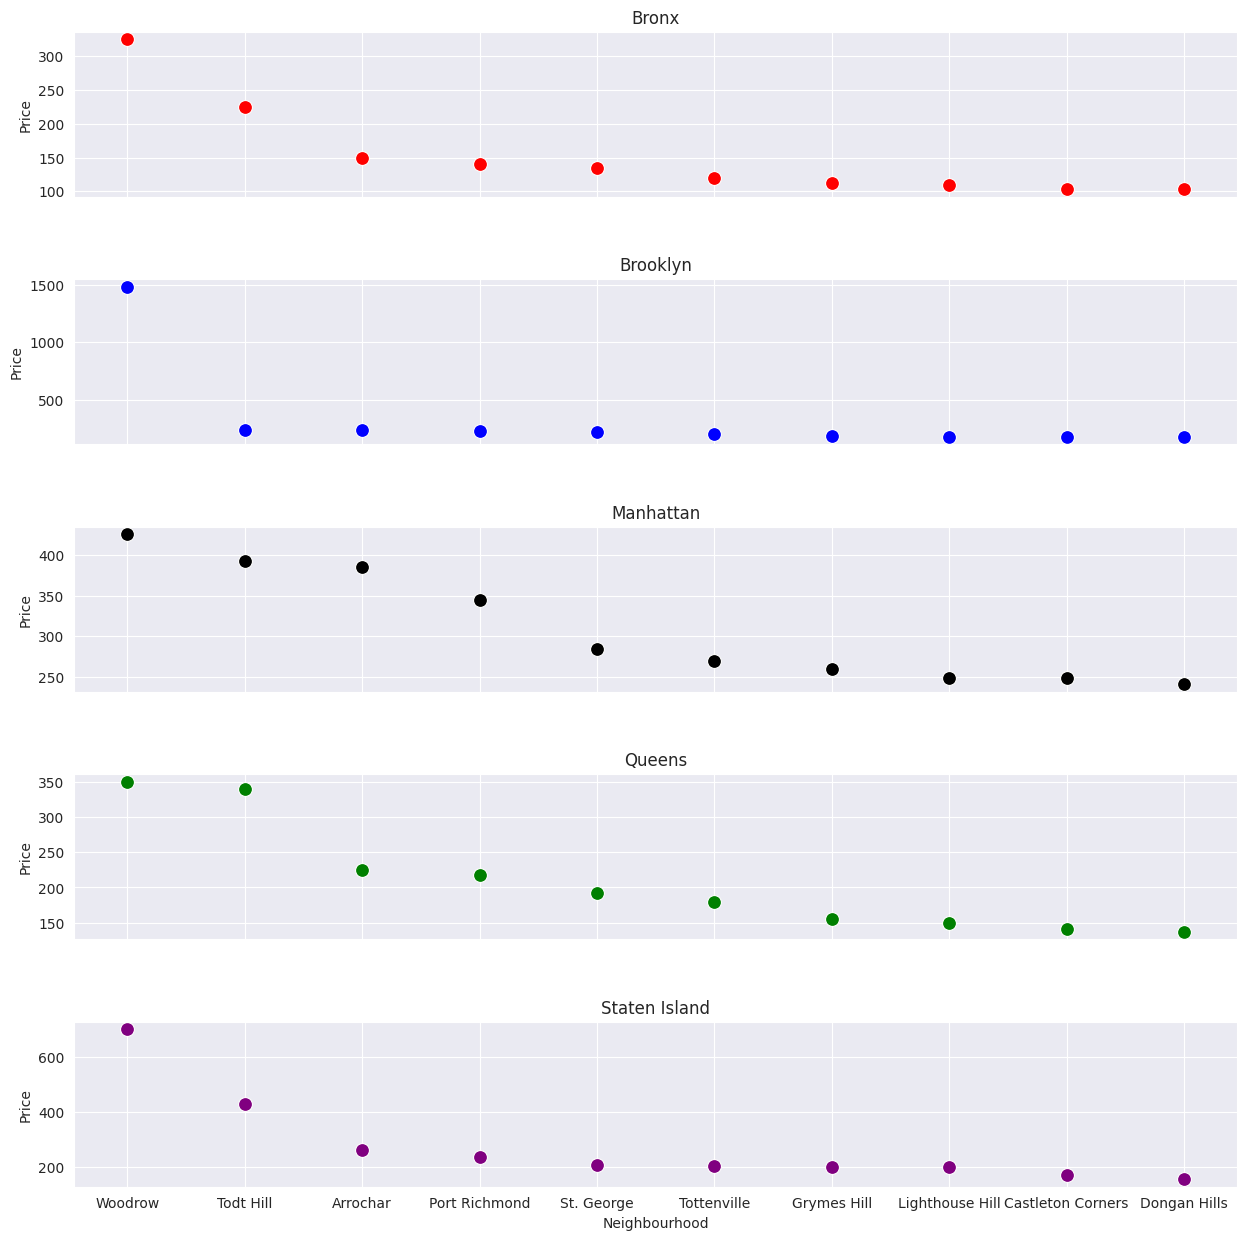

In [26]:
fig, axs = plt.subplots(5, figsize=(15, 15), gridspec_kw={'hspace': 0.5, 'wspace': 0})
sns.scatterplot(data=bronx, x='neighbourhood', y='price', ax=axs[0], color='red', s=100)
sns.scatterplot(data=brooklyn, x='neighbourhood', y='price', ax=axs[1], color='blue', s=100)
sns.scatterplot(data=manhattan, x='neighbourhood', y='price', ax=axs[2], color='black', s=100)
sns.scatterplot(data=queens, x='neighbourhood', y='price', ax=axs[3], color='green', s=100)
sns.scatterplot(data=staten, x='neighbourhood', y='price', ax=axs[4], color='purple', s=100)

axs[0].set_title('Bronx')
axs[1].set_title('Brooklyn')
axs[2].set_title('Manhattan')
axs[3].set_title('Queens')
axs[4].set_title('Staten Island')

for ax in axs:
    ax.set(xlabel='Neighbourhood', ylabel='Price')
    ax.label_outer()

In [30]:
data_pred = pd.read_csv('/content/AB_NYC_2019.csv')

In [31]:
data_pred.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [32]:
data_pred.drop(['name', 'host_name', 'last_review', 'id'], inplace=True, axis=1)
data_pred['reviews_per_month'] = data_pred['reviews_per_month'].fillna(value=0, inplace=False)

In [33]:

data_pred.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [34]:
le = preprocessing.LabelEncoder()

le.fit(data_pred['neighbourhood_group'])
data_pred['neighbourhood_group']=le.transform(data_pred['neighbourhood_group'])

le.fit(data_pred['neighbourhood'])
data_pred['neighbourhood']=le.transform(data_pred['neighbourhood'])

le.fit(data_pred['room_type'])
data_pred['room_type']=le.transform(data_pred['room_type'])

In [42]:
data_pred.sort_values('price', ascending=True, inplace=True)

In [43]:
data_pred = data_pred[11:-6]

In [44]:
lm = LinearRegression()

In [48]:

X = data_pred.drop(['price', 'longitude'], inplace=False, axis=1)
y = data_pred['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



lm.fit(X_train, y_train)

LinearRegression()

In [49]:
predictions = lm.predict(X_test)

In [50]:

# Evaluated metrics

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 64.39545574831526
MSE (Mean Squared Error): 14110.726276358613
RMSE (Root mean squared error): 118.78857805512537
R2 score: 0.1700260701365197


In [51]:

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

,Actual Values,Predicted Values
0,295.0,184.391372
1,75.0,182.191837
2,250.0,210.573049
3,130.0,222.271619
4,140.0,199.489610
5,250.0,195.138731
6,450.0,195.784598
7,125.0,181.850201
8,200.0,206.293529
9,39.0,-16.771769


Text(0, 0.5, 'Test')

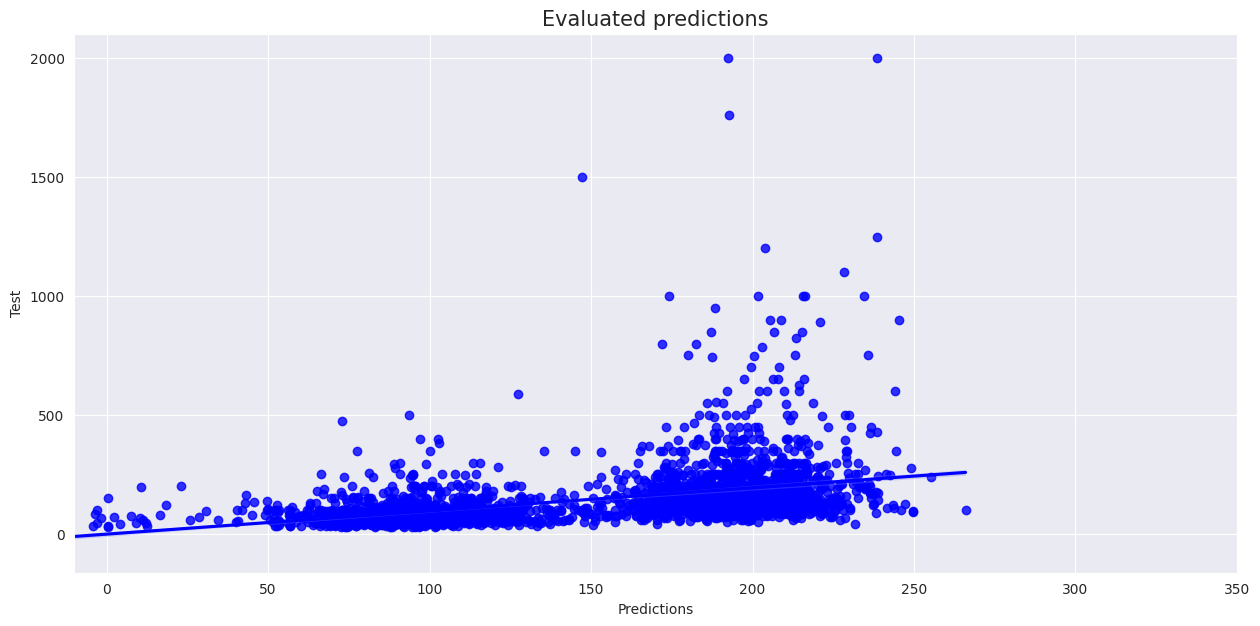

In [52]:
plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=predictions, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')